In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn
import numpy 
device = torch.device('cpu')
from experiments.dataloaders import ConcentricSphere
from torch.utils.data import DataLoader
from viz.plots import single_feature_plt

# Create training data in 2D, consisting of a concentric disk and an annulus
data_dim = 2
data_concentric = ConcentricSphere(data_dim, inner_range=(0., .5), outer_range=(1., 1.5), 
                                   num_points_inner=1000, num_points_outer=2000)
dataloader = DataLoader(data_concentric, batch_size=64, shuffle=True)

# Visualize a batch of data (use a large batch size for visualization)
dataloader_viz = DataLoader(data_concentric, batch_size=256, shuffle=True)
for inputs, targets in dataloader_viz:
    break
    
from hamiltonianNN.training import Trainer
from hamiltonianNN.discrete_models import  HamilNet
from anode.discrete_models import  ResNet

from viz.plots import trajectory_plt

# To make the plot clearer, we will use a smaller batch of data
for small_inputs, small_targets in dataloader:
    break

from viz.plots import input_space_plt

    
data_concentric2 = ConcentricSphere(data_dim, inner_range=(0., .5), outer_range=(1., 1.5), 
                                   num_points_inner=100, num_points_outer=200)
dataloader2 = DataLoader(data_concentric2, batch_size=64, shuffle=True)
dataloader_viz2 = DataLoader(data_concentric2, batch_size=256, shuffle=True)
for test_inputs, test_targets in dataloader_viz2:
    break


In [38]:
num_epochs = 24
num_layer =100
final_time=5
hidden_dim=32
model = HamilNet(device, data_dim,hidden_dim, num_layers=num_layer, augment_dim=0,final_time=final_time,activation='relu')

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

trainer = Trainer(model, optimizer, device,verbose=False)
trainer.train(dataloader,test_inputs, test_targets,num_epochs)

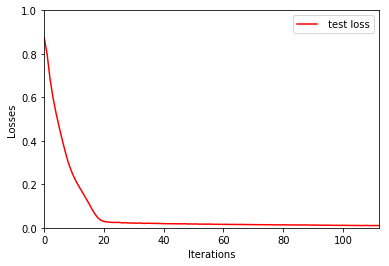

In [43]:
plt.plot(trainer.histories['test_loss_history'],color='red',label=' test loss')
#plt.plot(trainer.histories['loss_history'],label='Train loss')
plt.xlim(0, len(trainer.histories['test_loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Losses')
plt.legend()



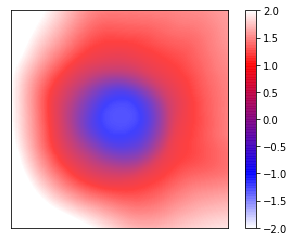

In [40]:
input_space_plt(model)

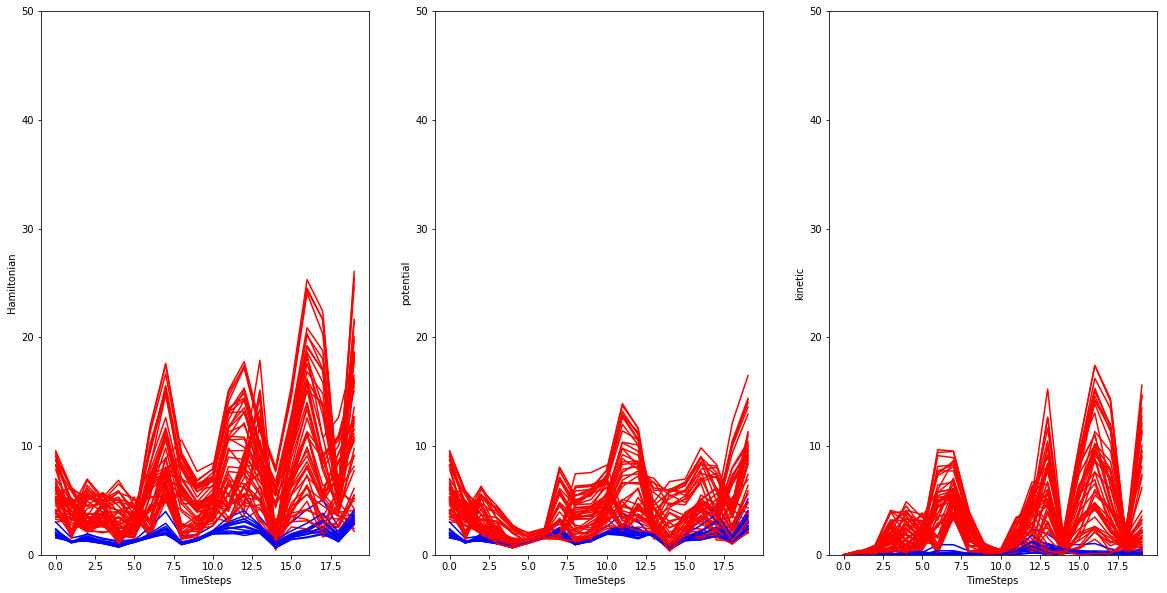

In [42]:
from viz.plots import Hamiltonian_discret_computation
Hamiltonian_discret_computation(model,small_inputs, small_targets,show=True,y=50)

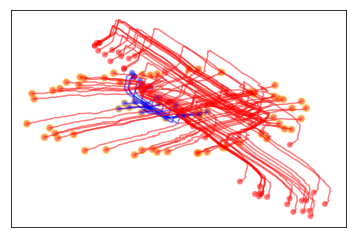

In [57]:

from viz.plots import trajectory_plt_discrete

trajectory_plt_discrete(model, small_inputs, small_targets)

In [13]:
model2 = HamilNet(device, data_dim, num_layers=num_layer, augment_dim=1,final_time=final_time)

optimizer2 = torch.optim.Adam(model2.parameters(), lr=1e-3)

trainer2 = Trainer(model2, optimizer2, device,verbose=False)
trainer2.train(dataloader,test_inputs, test_targets,num_epochs)

Text(0, 0.5, 'Loss')

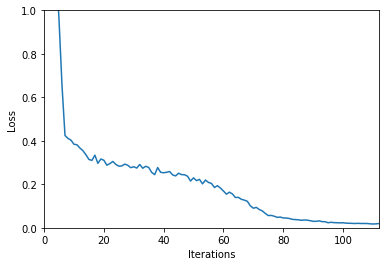

In [14]:
plt.plot(trainer2.histories['loss_history'])
plt.xlim(0, len(trainer2.histories['loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Loss')

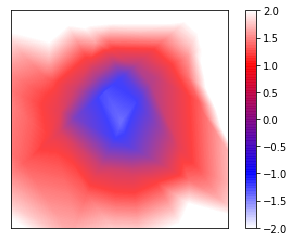

In [15]:
input_space_plt(model2)

In [17]:
model3 = HamilNet(device, data_dim, num_layers=num_layer, augment_dim=2,final_time=final_time)

optimizer3 = torch.optim.Adam(model3.parameters(), lr=1e-3)

trainer3 = Trainer(model3, optimizer3, device,verbose=False)
trainer3.train(dataloader,test_inputs, test_targets,num_epochs)

Text(0, 0.5, 'Loss')

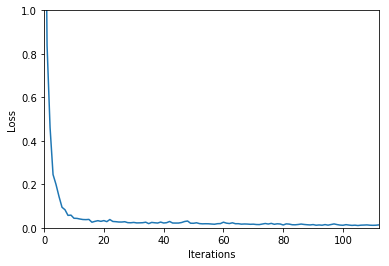

In [18]:
plt.plot(trainer3.histories['loss_history'])
plt.xlim(0, len(trainer3.histories['loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Loss')

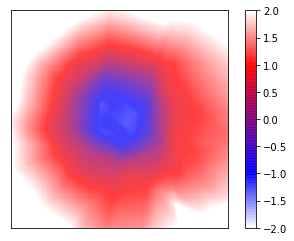

In [19]:
input_space_plt(model3)

In [ ]:

model4 = HamilNet(device, data_dim, num_layers=num_layer, augment_dim=5,final_time=final_time)

optimizer4 = torch.optim.Adam(model4.parameters(), lr=1e-3)

trainer4 = Trainer(model4, optimizer4, device,verbose=False)
trainer4.train(dataloader,test_inputs, test_targets,num_epochs)

In [ ]:
input_space_plt(model4)

In [ ]:
model5 = HamilNet(device, data_dim, num_layers=num_layer, augment_dim=10,final_time=final_time)

optimizer5 = torch.optim.Adam(model5.parameters(), lr=1e-3)

trainer5 = Trainer(model5, optimizer5, device,verbose=False)
trainer5.train(dataloader,test_inputs, test_targets,num_epochs)


In [ ]:
input_space_plt(model5)

In [123]:
model6 = HamilNet(device, data_dim, num_layers=num_layer, augment_dim=30,final_time=final_time)

optimizer6 = torch.optim.Adam(model6.parameters(), lr=1e-3)

trainer6 = Trainer(model6, optimizer6, device,verbose=False)
trainer6.train(dataloader,test_inputs, test_targets,num_epochs)


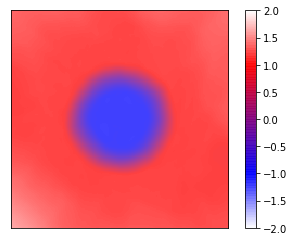

In [124]:
input_space_plt(model6)

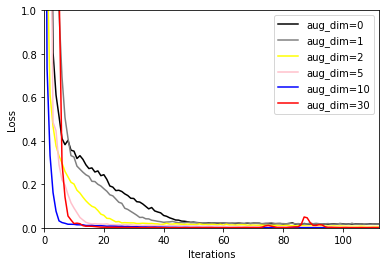

In [116]:
plt.plot(trainer.histories['loss_history'],color='black',label='aug_dim=0')
plt.plot(trainer2.histories['loss_history'],color='gray',label='aug_dim=1')
plt.plot(trainer3.histories['loss_history'],color='yellow',label='aug_dim=2')
plt.plot(trainer4.histories['loss_history'],color='pink',label='aug_dim=5')
plt.plot(trainer5.histories['loss_history'],color='blue',label='aug_dim=10')
plt.plot(trainer6.histories['loss_history'],color='red',label='aug_dim=30')
plt.xlim(0, len(trainer5.histories['loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

# resnet


In [63]:
model5 = ResNet(data_dim,hidden_dim=32, num_layers=10)

optimizer5 = torch.optim.Adam(model5.parameters(), lr=1e-3)

trainer5 = Trainer(model5, optimizer5, device,verbose=False)
trainer5.train(dataloader,test_inputs, test_targets,num_epochs)

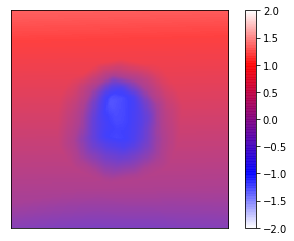

In [64]:
input_space_plt(model5)

Text(0, 0.5, 'Loss')

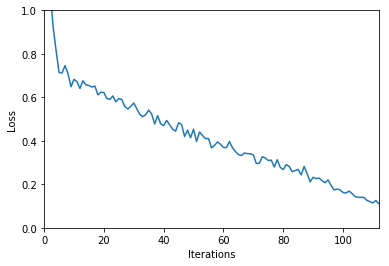

In [66]:
plt.plot(trainer5.histories['loss_history'])
plt.xlim(0, len(trainer5.histories['loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Loss')

In [67]:
model5 = ResNet(data_dim,hidden_dim=32, num_layers=20)

optimizer5 = torch.optim.Adam(model5.parameters(), lr=1e-3)

trainer5 = Trainer(model5, optimizer5, device,verbose=False)
trainer5.train(dataloader,test_inputs, test_targets,num_epochs)

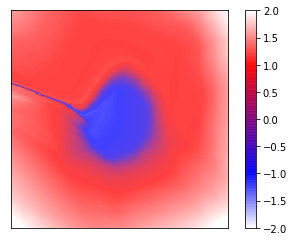

In [68]:
input_space_plt(model5)

Text(0, 0.5, 'Loss')

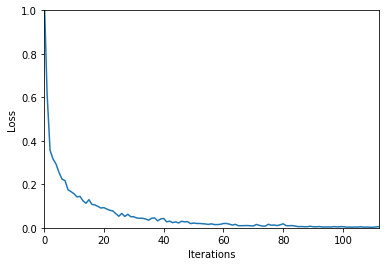

In [69]:
plt.plot(trainer5.histories['loss_history'])
plt.xlim(0, len(trainer5.histories['loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Loss')

In [128]:
model5 = ResNet(data_dim,hidden_dim=32, num_layers=50)

optimizer5 = torch.optim.Adam(model5.parameters(), lr=1e-3)

trainer5 = Trainer(model5, optimizer5, device,verbose=False)
trainer5.train(dataloader,test_inputs, test_targets,num_epochs)

Text(0, 0.5, 'Loss')

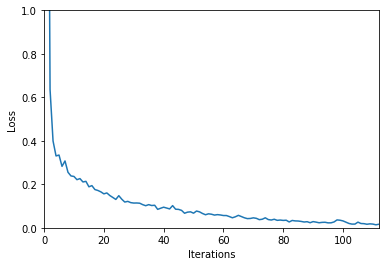

In [129]:
plt.plot(trainer5.histories['loss_history'])
plt.xlim(0, len(trainer5.histories['loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Loss')

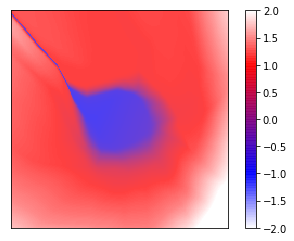

In [130]:
input_space_plt(model5)